In [3]:
# script that explores the results from assessing trends with respect to 
# preferential interaction of causal genes with TiP genes from the tissue 
# where the disease manifests

import numpy, pandas
import matplotlib.pyplot as plt
import database_utils
import config
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

% matplotlib inline

data_path = '../data/katjas_data/tissue_spec_disease_edgotyping/'
figure_path = '../figures/'

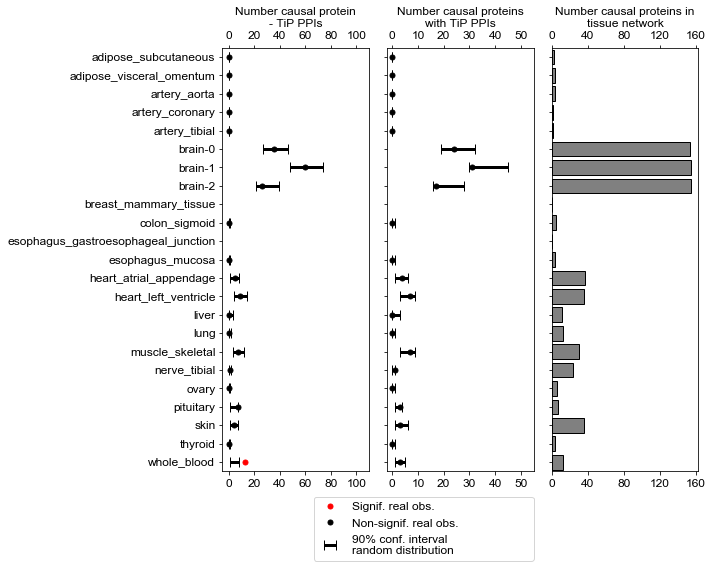

In [4]:
# plot the results from looking at trends of causal genes interacting with TiP genes from the tissues 
# being specifically affected by the disease
# plot the mean and std of random distributions and actual observation and modulate the color for whether it is 
# significant or not
TiP_cutoff = '2.0'
types = ['num_PPIs','num_CGs']
network_name = 'HI-III'

infile = '{}/{}_CG_TiP_connect_CSNs_TiPcutoff{}.txt'.\
        format(data_path,network_name,TiP_cutoff)
ref_df = pandas.read_table(infile,index_col=0)
ref_df['counter'] = range(ref_df.shape[0])

plt.figure(figsize=(10,8))

plt.subplot(1,3,1)
pval_col = 'PPI_pvalue'
median_col = 'PPI_median'
perc5_col = 'PPI_5perc'
perc95_col = 'PPI_95perc'
real_obs = 'num_CG_TiP_PPIs'
ref_df['lower_err'] = ref_df[median_col] - ref_df[perc5_col]
ref_df['upper_err'] = ref_df[perc95_col] - ref_df[median_col]

plt.errorbar(ref_df[median_col],ref_df['counter'],
             xerr=list(ref_df[['lower_err','upper_err']].transpose().values),
             marker='',linestyle='',elinewidth=3,ecolor='black',capsize=5)
ref_df_signif = ref_df.loc[ref_df[pval_col]<=0.05/21,]
plt.plot(ref_df_signif[real_obs],ref_df_signif['counter'],
         marker='.',linestyle='',markersize=10,color='red')
ref_df_signif = ref_df.loc[ref_df[pval_col]>0.05/21,]
plt.plot(ref_df_signif[real_obs],ref_df_signif['counter'],
         marker='.',linestyle='',markersize=10,color='black')

plt.ylim([-0.5,ref_df.shape[0]-0.5])
ax = plt.gca()
ax.invert_yaxis()
plt.yticks(range(ref_df.shape[0]),ref_df.index.tolist(),fontsize=12)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.xlim([-5,110])
plt.xticks(range(0,110,20),range(0,110,20),fontsize=12)
plt.xlabel('Number causal protein\n- TiP PPIs',fontsize=12)
ax.tick_params(axis='x',which='major',labeltop=True,labelbottom=True,bottom=True,top=True)

###############

plt.subplot(1,3,2)
pval_col = 'CG_pvalue'
median_col = 'CG_median'
perc5_col = 'CG_5perc'
perc95_col = 'CG_95perc'
real_obs = 'num_CGs_with_TiP_PPIs'
ref_df['lower_err'] = ref_df[median_col] - ref_df[perc5_col]
ref_df['upper_err'] = ref_df[perc95_col] - ref_df[median_col]

plt.errorbar(ref_df[median_col],ref_df['counter'],
             xerr=list(ref_df[['lower_err','upper_err']].transpose().values),
             marker='',linestyle='',elinewidth=3,ecolor='black',capsize=5,label='90% conf. interval\nrandom distribution')
ref_df_signif = ref_df.loc[ref_df[pval_col]<=0.05/21,]
plt.plot(ref_df_signif[real_obs],ref_df_signif['counter'],
         marker='.',linestyle='',markersize=10,color='red',label='Signif. real obs.')
ref_df_signif = ref_df.loc[ref_df[pval_col]>0.05/21,]
plt.plot(ref_df_signif[real_obs],ref_df_signif['counter'],
         marker='.',linestyle='',markersize=10,color='black',label='Non-signif. real obs.')

plt.ylim([-0.5,ref_df.shape[0]-0.5])
ax = plt.gca()
ax.invert_yaxis()
plt.yticks(range(ref_df.shape[0]),['' for i in range(ref_df.shape[0])])
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.xlim([-2,55])
plt.xticks(range(0,55,10),range(0,55,10),fontsize=12)
plt.xlabel('Number causal proteins\nwith TiP PPIs',fontsize=12)
ax.tick_params(axis='x',which='major',labeltop=True,labelbottom=True,bottom=True,top=True)
lgd = plt.legend(bbox_to_anchor=(-0.5,-0.05,1.5,-0.01),loc=1,ncol=1,mode="expand",borderaxespad=0.,fontsize=12)

###############

plt.subplot(1,3,3)
plt.barh(ref_df['counter'],ref_df['num_CGs_in_CSN'],height=0.8,edgecolor='black',color='grey')
plt.ylim([-0.5,ref_df.shape[0]-0.5])
ax = plt.gca()
ax.invert_yaxis()
plt.yticks(range(ref_df.shape[0]),['' for i in range(ref_df.shape[0])])
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.xticks(range(0,165,40),range(0,165,40),fontsize=12)
plt.xlabel('Number causal proteins in\ntissue network',fontsize=12)
ax.tick_params(axis='x',which='major',labeltop=True,labelbottom=True,bottom=True,top=True)

plt.tight_layout()
outfile = '{}/{}_CG_TiP_connect_CSNs_TiPcutoff{}'.\
        format(figure_path,network_name,TiP_cutoff)
plt.savefig(outfile + '.pdf',format='pdf',dpi=300,bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig(outfile + '.png',format='png',dpi=300,bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()